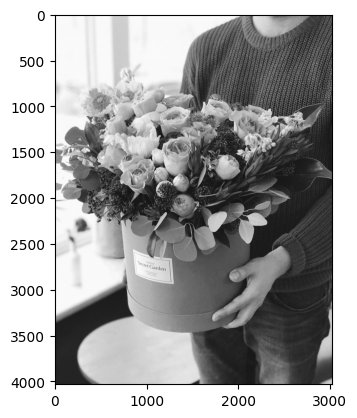

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy

image_array = plt.imread("./flower.jpg")
if len(image_array.shape) == 3:
  image_array = image_array.mean(axis=2)
plt.imshow(image_array, cmap="gray")
plt.show()

In [2]:
def convo2d(input, kernel):
  H, W = input.shape
  M, N = kernel.shape
  out = np.zeros((H - M + 1, W - N + 1), dtype=float)
  kernel = np.flip(kernel)
  for i in range(H - M + 1):
    for j in range(W - N + 1):
      out[i, j] = np.sum(input[i : i + M, j : j + N] * kernel)
  return out

In [3]:
gaussian_kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
gaussian_kernel = gaussian_kernel / gaussian_kernel.sum()
convo_out_blur = scipy.signal.convolve2d(image_array, gaussian_kernel)

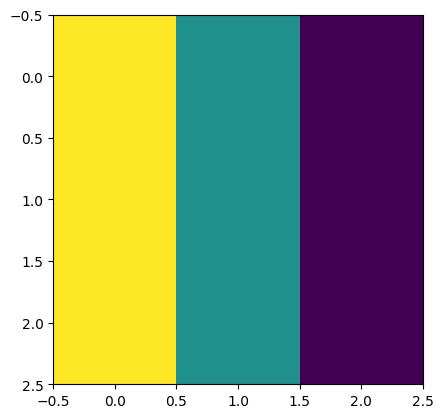

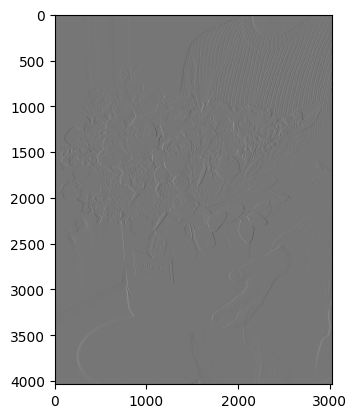

In [4]:
verti_sobel = np.zeros((3, 3), dtype=float)
verti_sobel[:, 0] = 1.0
verti_sobel[:, 2] = -1.0
plt.imshow(verti_sobel)
plt.show()
convo_out_vert = scipy.signal.convolve2d(convo_out_blur, verti_sobel)
plt.imshow(convo_out_vert, cmap="gray")
plt.show()

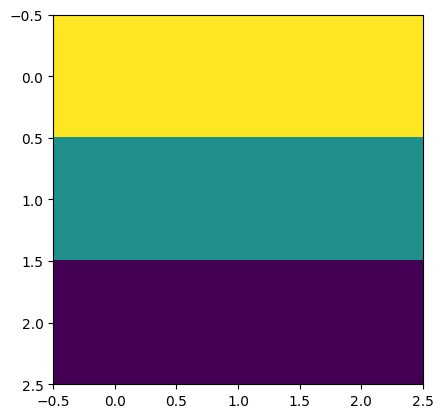

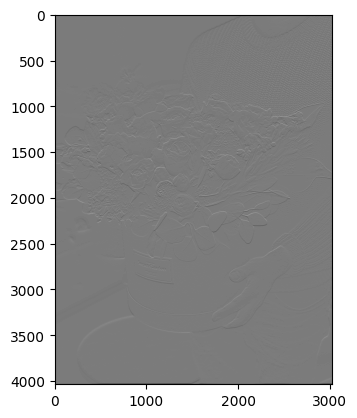

In [5]:
horiz_sobel = verti_sobel.T
plt.imshow(horiz_sobel)
plt.show()
convo_out_horiz = scipy.signal.convolve2d(convo_out_blur, horiz_sobel)
plt.imshow(convo_out_horiz, cmap="gray")
plt.show()

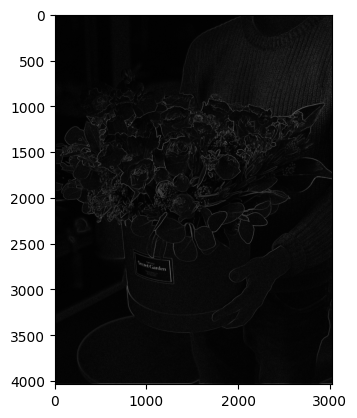

In [6]:
conv_out_mag = (convo_out_vert**2 + convo_out_horiz**2) ** 0.5
conv_out_mag_norm = conv_out_mag / (255 * 2)
plt.imshow(conv_out_mag, cmap="gray")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


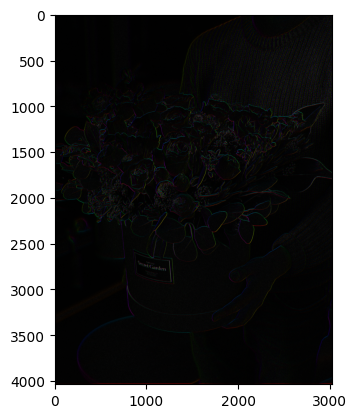

In [7]:
conv_dir = np.arctan2(convo_out_vert, (convo_out_horiz))
conv_dir_norm = (conv_dir + np.pi) / (np.pi * 2)
rgb_image = matplotlib.colors.hsv_to_rgb(np.stack((conv_dir_norm, np.ones_like(conv_dir_norm), conv_out_mag_norm), axis=-1))
plt.imshow(rgb_image)